<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Theoretical-recall:-one-hot-hashing-trick" data-toc-modified-id="Theoretical-recall:-one-hot-hashing-trick-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Theoretical recall: one-hot hashing trick</a></span></li><li><span><a href="#Import-libraries/modules" data-toc-modified-id="Import-libraries/modules-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import libraries/modules</a></span></li><li><span><a href="#How-%-operator-works-in-python" data-toc-modified-id="How-%-operator-works-in-python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How % operator works in python</a></span></li><li><span><a href="#How-to-use-the-hashing-trick" data-toc-modified-id="How-to-use-the-hashing-trick-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>How to use the hashing trick</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

<div class="alert alert-warning">
<font color=black>

**What?** One-hot encoding with hashing trick
    
</font>
</div>

# Theoretical recall: one-hot hashing trick

<div class="alert alert-block alert-info">
<font color=black><br>

- **What?** One-hot hashing trick, which you can use when the number of unique tokens in your vocabulary is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, you can hash words into vectors of fixed size. This is typically done with a very lightweight hashing function.
- **Pros?** This saves memory and allows online encoding of the data (you can generate token vectors right away, before you’ve seen all of the available data). 
- **Issue?** It’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell the difference between these words. 
- **How often does it happen?** The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed. 

<br></font>
</div>

# Import libraries/modules

In [5]:
import numpy as np

# How % operator works in python

<div class="alert alert-block alert-info">
<font color=black><br>

- Stores the words as vectors of size 1,000. 
- If you have close to 1,000 words (or more), you’ll see many hash collisions, which will decrease the accuracy of this encoding method.
- The **%** symbol in Python is called the Modulo Operator. It returns the remainder of dividing the left hand operand by right hand operand. It's used to get the remainder of a division problem.

<br></font>
</div>

In [19]:
print(2.%2.)
print(7.%2.)
print(7/2)

0.0
1.0
3.5


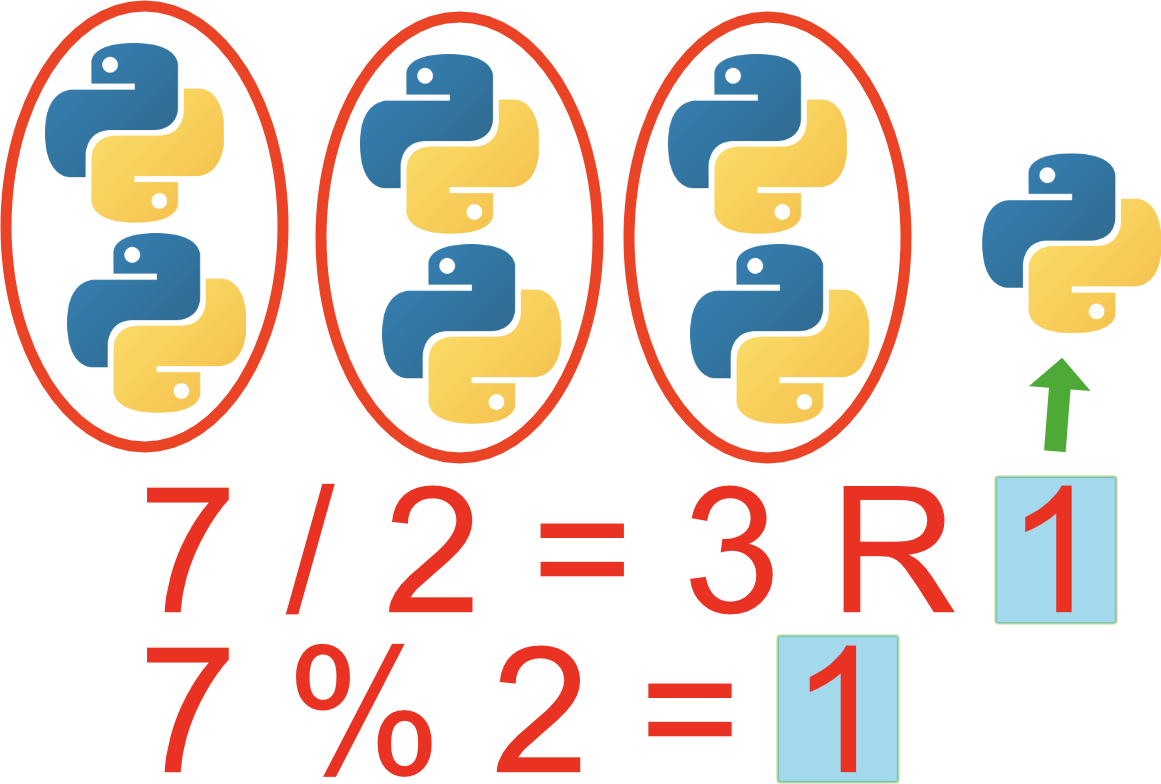

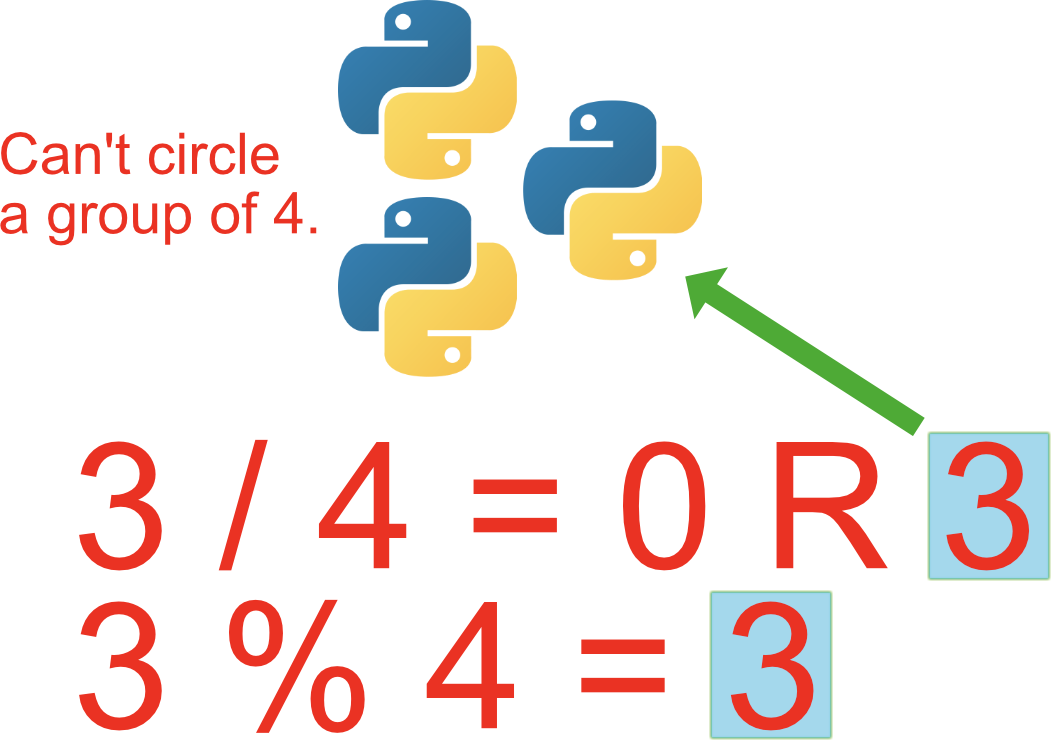

# How to use the hashing trick

<div class="alert alert-block alert-info">
<font color=black><br>

- Stores the words as vectors of size 1,000. 
- If you have close to 1,000 words (or more), you’ll see many hash collisions, which will decrease the accuracy of this encoding method.

<br></font>
</div>

In [1]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [2]:
dimensionality = 1000
max_length = 10

In [13]:
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hashes the word into a random integer index between 0 and 1,000
        print("----------------")
        print("This is the word:", word)
        print("This is its hash:", hash(word))
        index = abs(hash(word)) % dimensionality
        print("This is is ashed index: ", index)
        results[i, j, index] = 1.

----------------
This is the word: The
This is its hash: 3331548695857502592
This is is ashed index:  592
----------------
This is the word: cat
This is its hash: 8922217786024802445
This is is ashed index:  445
----------------
This is the word: sat
This is its hash: -5089463693470794266
This is is ashed index:  266
----------------
This is the word: on
This is its hash: -8234803027002226052
This is is ashed index:  52
----------------
This is the word: the
This is its hash: 2948328679150060538
This is is ashed index:  538
----------------
This is the word: mat.
This is its hash: -4804813486598562186
This is is ashed index:  186
----------------
This is the word: The
This is its hash: 3331548695857502592
This is is ashed index:  592
----------------
This is the word: dog
This is its hash: -4416439888106905458
This is is ashed index:  458
----------------
This is the word: ate
This is its hash: 8630268389184436299
This is is ashed index:  299
----------------
This is the word: my
This 

In [7]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

# References

<div class="alert alert-block alert-warning">
<font color=black>

- Chollet, Francois. Deep learning with Python. Simon and Schuster, 2017.
- https://github.com/fchollet/deep-learning-with-python-notebooks

</font>
</div>